# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import sys
sys.path.append("../src")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from sofenn.FuzzyNetwork import FuzzyNetwork

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

C:\Users\Andrew\PycharmProjects\sofenn\demos\../src\sofenn\FuzzyNetwork.py:285: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.prob_type is 'classification':
C:\Users\Andrew\PycharmProjects\sofenn\demos\../src\sofenn\FuzzyNetwork.py:293: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.prob_type is 'classification':


## Read in and prep Iris Dataset

In [3]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

In [4]:
import pandas

In [5]:
features = pandas.DataFrame(iris.data, columns=iris.feature_names)
#features.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris/features.csv', index=False)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
target = pandas.DataFrame(Y, columns=iris.target_names)
#target.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris/target.csv', index=False)
target.head()

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [7]:
df = pandas.concat([pandas.DataFrame(iris.data), pandas.Series(iris.target)], axis=1)
df.columns = iris.feature_names + ['target']
#df.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris.csv', index=False)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
X_train.shape

(135, 4)

In [10]:
fuzz = FuzzyNetwork(
            X_train, X_test, y_train, y_test,           # data attributes
            neurons=5, max_neurons=100,                 # initialization parameters
            ifpart_thresh=0.1354, err_delta=0.12        # evaluation and ifpart threshold
            )

Building Fuzzy Network with 5 neurons...
...Model successfully built!


In [11]:
fuzz.compile_model()

Compiling model...


Model: "FuzzyNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Inputs (InputLayer)           │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ FuzzyRules (FuzzyLayer)       │ (None, 5)                 │              40 │ Inputs[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Normalize (NormalizeLayer)    │ (None, 5)                 │               0 │ FuzzyRules[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Weights (WeightedLayer)       │ (None, 5)                 │              25 │ Inputs[0][0],              │
│                               │                           │                 │ Normalize[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Outputs (OutputLayer)         │ (None, 1)                 │               0 │ Weights[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Softmax (Dense)               │ (None, 3)                 │               6 │ Outputs[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 71 (284.00 B)

 Trainable params: 71 (284.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
fuzz.train_model(epochs=150)

Training model...
Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.6667 - loss: 10.5747
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6667 - loss: 10.5748
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6667 - loss: 10.5334  
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6667 - loss: 10.5087
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6667 - loss: 10.5259
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6667 - loss: 10.4911
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6667 - loss: 10.4870
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6667 - loss: 10.4606  
Epoch 9/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6667 - loss: 10.4776
Epoch 10/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6667 - loss: 10.4239
Epoch 11/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy

135/135 [==============================] - 0s 22us/step - loss: 3.4257 - binary_accuracy: 0.8667
Epoch 147/150
135/135 [==============================] - 0s 31us/step - loss: 3.4486 - binary_accuracy: 0.8667
Epoch 148/150
135/135 [==============================] - 0s 22us/step - loss: 3.3268 - binary_accuracy: 0.8667
Epoch 149/150
135/135 [==============================] - 0s 22us/step - loss: 3.4221 - binary_accuracy: 0.8667
Epoch 150/150
135/135 [==============================] - 0s 22us/step - loss: 3.3393 - binary_accuracy: 0.8667


In [13]:
fuzz.get_layer_weights('FuzzyRules')

[array([[ 4.7492924 ,  4.790695  ,  7.5804453 ,  4.656826  ,  5.2169046 ],
        [ 1.6686311 ,  3.8063092 ,  2.6037905 ,  3.4895945 ,  1.9478443 ],
        [ 4.7376823 ,  0.86031127,  6.8450065 ,  0.98273116,  4.8048644 ],
        [ 1.8645504 , -0.38991344,  2.7458613 , -0.44219995,  1.8207159 ]],
       dtype=float32),
 array([[3.057403 , 3.6483605, 3.6126976, 3.618259 , 3.0660136],
        [2.8549497, 3.6923668, 3.6936793, 4.1857514, 2.8239267],
        [3.059935 , 3.3598332, 3.1031654, 3.3158014, 3.0323253],
        [3.023966 , 3.2467036, 2.967502 , 3.207008 , 3.0145578]],
       dtype=float32)]

In [14]:
X_test

array([[5.1, 3.3, 1.7, 0.5],
       [4.8, 3.1, 1.6, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [7.2, 3.6, 6.1, 2.5],
       [5.2, 2.7, 3.9, 1.4],
       [4.3, 3. , 1.1, 0.1],
       [5.4, 3.9, 1.7, 0.4],
       [5.5, 4.2, 1.4, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6. , 2.2, 5. , 1.5],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.7, 1.5, 0.2],
       [6.3, 2.5, 4.9, 1.5],
       [6.7, 3.1, 4.7, 1.5],
       [5. , 3. , 1.6, 0.2]])

In [15]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [16]:
y_pred = fuzz.model.predict(X_test)
y_pred.round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [17]:
acc = y_test == y_pred.round()
acc

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False, False],
       [ True, False,  True],
       [ True,  True,  True]])

In [18]:
acc.sum() / acc.size

0.9111111111111111

## Model Prediction Results

In [19]:
pred_loss, pred_bin_acc = fuzz.model.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - binary_accuracy: 0.9111 - loss: 1.3717
Model Loss: 1.37166393
Binary Accuracy: 91.1%


In [20]:
fuzz.model.metrics_names

['loss', 'compile_metrics']

## Plot Results

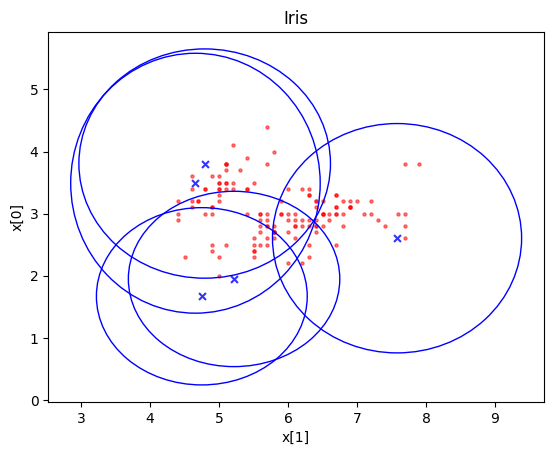

In [21]:
w = fuzz.get_layer_weights('FuzzyRules')


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], color='r', alpha=0.5, s=5)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], color='b', alpha=0.8, s=25, marker='x')
plt.show()